# <span style="color:#FF7B07"><div align="center">**Import Libraries and Load Data** <a  name="2"></a>

In [1]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from plotly.subplots import make_subplots
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline

In [2]:
# The data is large and this command will help us to see the whole result 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [102]:
data = pd.read_csv('../data/myFitnessPal_data_prepared_to_use.csv')

In [103]:
data = data[data["logged_frequency"]>40]
data = data.sort_values(by=['reach_goal']).iloc[500:]

In [106]:
data["reach_goal"].value_counts()

0.0    2623
1.0    1153
Name: reach_goal, dtype: int64

In [107]:
# for i in data.columns[1:21]:
#     temp = data[i]
#     count = 1
#     for j in data.columns[21:]:
#         if i in j:
#             temp=temp+data[j]
#             count+=1
#     temp=temp/count
#     data[i] = temp

In [108]:
print(f'\n Data shape - {data.shape} ')
print(f' Unique users - {data["user_id"].nunique()} \n')
data.head(1)


 Data shape - (3776, 146) 
 Unique users - 3776 



,user_id,total_calories,total_carbs,total_fat,total_protein,total_sodium,total_sugar,goal_calories,goal_carbs,goal_fat,goal_protein,goal_sodium,goal_sugar,foods_len,healtyDistrib,calories_diff,carbs_diff,fat_diff,protein_diff,sodium_diff,sugar_diff,total_calories_1,total_carbs_1,total_fat_1,total_protein_1,total_sodium_1,total_sugar_1,goal_calories_1,goal_carbs_1,goal_fat_1,goal_protein_1,goal_sodium_1,goal_sugar_1,foods_len_1,healtyDistrib_1,calories_diff_1,carbs_diff_1,fat_diff_1,protein_diff_1,sodium_diff_1,sugar_diff_1,total_calories_2,total_carbs_2,total_fat_2,total_protein_2,total_sodium_2,total_sugar_2,goal_calories_2,goal_carbs_2,goal_fat_2,goal_protein_2,goal_sodium_2,goal_sugar_2,foods_len_2,healtyDistrib_2,calories_diff_2,carbs_diff_2,fat_diff_2,protein_diff_2,sodium_diff_2,sugar_diff_2,total_calories_3,total_carbs_3,total_fat_3,total_protein_3,total_sodium_3,total_sugar_3,goal_calories_3,goal_carbs_3,goal_fat_3,goal_protein_3,goal_sodium_3,goal_sugar_3,foods_len_3,healtyDistrib_3,calories_diff_3,carbs_diff_3,fat_diff_3,protein_diff_3,sodium_diff_3,sugar_diff_3,total_calories_4,total_carbs_4,total_fat_4,total_protein_4,total_sodium_4,total_sugar_4,goal_calories_4,goal_carbs_4,goal_fat_4,goal_protein_4,goal_sodium_4,goal_sugar_4,foods_len_4,healtyDistrib_4,calories_diff_4,carbs_diff_4,fat_diff_4,protein_diff_4,sodium_diff_4,sugar_diff_4,total_calories_5,total_carbs_5,total_fat_5,total_protein_5,total_sodium_5,total_sugar_5,goal_calories_5,goal_carbs_5,goal_fat_5,goal_protein_5,goal_sodium_5,goal_sugar_5,foods_len_5,healtyDistrib_5,calories_diff_5,carbs_diff_5,fat_diff_5,protein_diff_5,sodium_diff_5,sugar_diff_5,total_calories_6,total_carbs_6,total_fat_6,total_protein_6,total_sodium_6,total_sugar_6,goal_calories_6,goal_carbs_6,goal_fat_6,goal_protein_6,goal_sodium_6,goal_sugar_6,foods_len_6,healtyDistrib_6,calories_diff_6,carbs_diff_6,fat_diff_6,protein_diff_6,sodium_diff_6,sugar_diff_6,logged_frequency,start_date,days_missed,reach_goal,FoodGroup
3948,4568.0,0.439724,0.44464,0.307692,0.099042,0.305448,0.018787,0.451552,0.385737,0.297674,0.256684,0.418182,0.013585,0.135593,0.110555,0.457029,0.470693,0.477752,0.537764,0.551554,0.4,0.350658,0.44464,0.175214,0.185304,0.088051,0.015618,0.488036,0.416532,0.32093,0.278075,0.418182,0.014528,0.186441,0.043207,0.529759,0.487567,0.562061,0.509063,0.698132,0.402255,0.308389,0.300527,0.123932,0.111821,0.103903,0.00679,0.463634,0.395462,0.302326,0.262032,0.418182,0.013962,0.20339,0.054591,0.541688,0.548845,0.580796,0.534743,0.687444,0.406528,0.310114,0.29174,0.141026,0.115016,0.105901,0.00498,0.505094,0.432739,0.334884,0.286096,0.418182,0.015094,0.135593,0.053603,0.563109,0.573712,0.587822,0.546828,0.686097,0.40819,0.333621,0.346221,0.24359,0.172524,0.052884,0.01426,0.588012,0.504052,0.386047,0.334225,0.418182,0.017736,0.220339,0.044318,0.594023,0.585258,0.557377,0.546828,0.721843,0.404985,0.260945,0.289982,0.196581,0.14377,0.019848,0.015618,0.415778,0.356564,0.274419,0.235294,0.418182,0.012453,0.20339,0.04343,0.543997,0.53286,0.526932,0.504532,0.744117,0.40095,0.287255,0.300527,0.188034,0.175719,0.137072,0.00928,0.44942,0.385737,0.297674,0.254011,0.418182,0.013585,0.20339,0.023669,0.546562,0.543517,0.543326,0.5,0.66508,0.404985,56.0,0.833333,0.0,0.0,0.047619


In [109]:
# matrix = data[['total_carbs', 'total_fat', 'total_protein', 'total_sodium', 'total_sugar', 'foods_len', 
#           'healtyDistrib', 'calories_diff', 'carbs_diff', 'fat_diff', 'protein_diff', 'sodium_diff', 'sugar_diff', 
#           'start_date', 'FoodGroup']].corr()
# f, ax = plt.subplots(figsize=(12, 6))
# with sns.axes_style("white"):
#     sns.heatmap(matrix,mask=np.triu(matrix,1),annot=True,fmt=".2f", vmax=.8,cbar=False,cmap="coolwarm");

In [110]:
col1 = list(filter(lambda x: ("goal" in x) or ("user_id" in x) or ("reach_goal" in x) or ("logged_frequency" in x), data.columns))
col2 = list(filter(lambda x: ("_1" not in x) and ("_2" not in x) and ("_3" not in x) and ("_4" not in x) and ("_5" not in x) and ("_6" not in x) ,data.columns))

In [112]:
X = data.drop(columns=col1)
# X = data[col1]
y = data['reach_goal']
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [113]:
len(X_train.columns)

101

In [114]:
# from sklearn.decomposition import PCA
# pca = PCA().fit(X_train)

# plt.figure(figsize=(12,8))
# plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
# plt.xlabel('Number of components')
# plt.ylabel('Total explained variance')
# plt.xlim(0, 11)
# plt.yticks(np.arange(0, 1.1, 0.1))
# plt.axvline(3.5, c='b')
# plt.axhline(0.896, c='r')
# plt.show();

In [115]:
# from sklearn import decomposition
# pca = decomposition.PCA(n_components=80)
# # X_reduced_train = pca.fit_transform(data.drop(columns=["user_id","reach_goal"]))
# X_train_PCA = pca.fit_transform(X_train)
# X_test_PCA = pca.transform(X_test)

In [116]:
# X_train = pd.DataFrame(X_train_PCA)
# X_test = pd.DataFrame(X_test_PCA)

In [117]:
sm = SMOTE(random_state=42)

X_train_s,y_train_s =sm.fit_sample(X_train,y_train)
X_test_s,y_test_s =sm.fit_sample(X_test,y_test)

C:\Users\Raffael Kalandadze\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Raffael Kalandadze\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


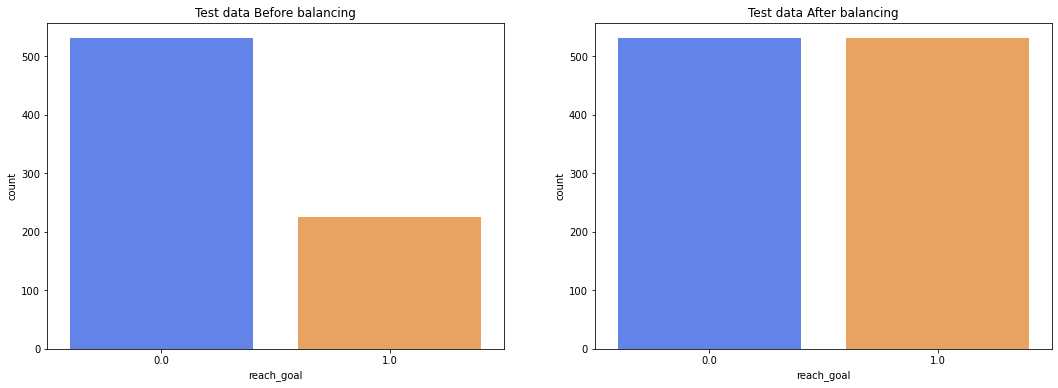

In [118]:
f, ax  = plt.subplots(1,2,figsize = (18,6))
sns.countplot(y_test,ax=ax[0],palette = 'bright',alpha=0.7,).set_title('Test data Before balancing')

sns.countplot(y_test_s,ax=ax[1],palette = 'bright',alpha=0.7).set_title('Test data After balancing')

plt.show()

C:\Users\Raffael Kalandadze\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Raffael Kalandadze\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


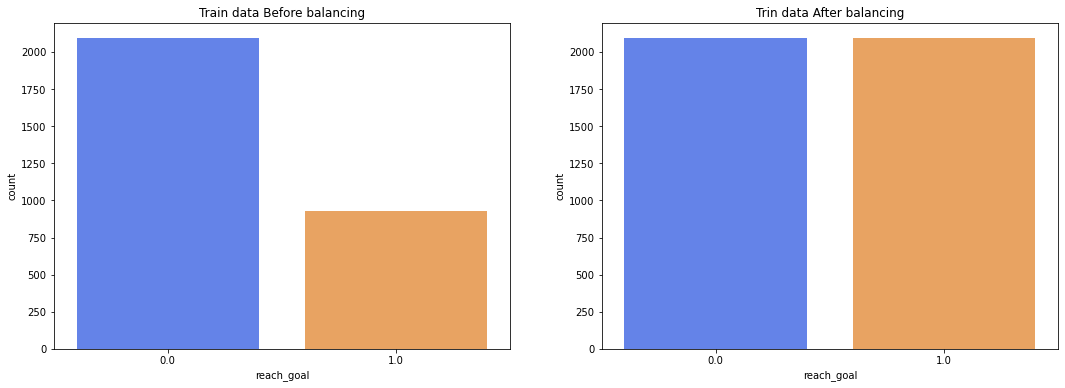

In [119]:
f, ax  = plt.subplots(1,2,figsize = (18,6))
sns.countplot(y_train,ax=ax[0],palette = 'bright',alpha=0.7).set_title('Train data Before balancing')

sns.countplot(y_train_s,ax=ax[1],palette = 'bright',alpha=0.7).set_title('Trin data After balancing')

plt.show()

X_train = X_train_s
y_train = y_train_s
X_test = X_test_s
y_test = y_test_s

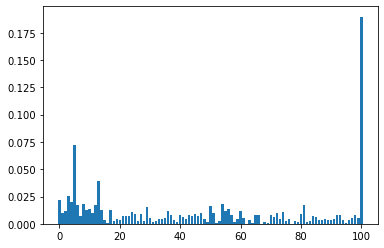

In [120]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
importance = model.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [121]:
# most important features
X_train.columns[importance.argsort()[-10:]]

Index(['foods_len', 'sodium_diff', 'calories_diff', 'sodium_diff_3', 'total_sodium', 'total_calories', 'total_protein', 'sugar_diff', 'total_sugar', 'FoodGroup'], dtype='object')

In [122]:
# less important features
X_train.columns[importance.argsort()[:10]]

Index(['healtyDistrib_5', 'foods_len_4', 'protein_diff_4', 'calories_diff_4', 'fat_diff_3', 'protein_diff_6', 'sugar_diff_4', 'total_fat_1', 'healtyDistrib_3', 'total_fat_4'], dtype='object')

In [123]:
cv = KFold(n_splits=10,shuffle = True,random_state=42)
accuracies = list()
depth_range = range(1, 10)

# Testing max_depths from 1 to 10
for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(max_depth = depth,random_state = 42)

    for train_fold, valid_fold in cv.split(X_train):
        f_train_x = X_train.iloc[train_fold] 
        f_train_y = y_train.iloc[train_fold]
        
        f_valid_x = X_train.iloc[valid_fold]
        f_valid_y = y_train.iloc[valid_fold]

        model = tree_model.fit(X = f_train_x,y = f_train_y) # We fit the model with the fold train data
        valid_acc = model.score(X = f_valid_x,y = f_valid_y) # We calculate accuracy with the fold validation data
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.675667
         2          0.709130
         3          0.735423
         4          0.738527
         5          0.729684
         6          0.737327
         7          0.736858
         8          0.737575
         9          0.736854


In [124]:
decision_tree = DecisionTreeClassifier(max_depth=3,random_state=42)
decision_tree.fit(X_train, y_train)

# Predicting results for test dataset
y_pred_train = decision_tree.predict(X_train)
y_pred_test = decision_tree.predict(X_test)

In [125]:
# from sklearn import tree
# fig = plt.figure(figsize=(35,18))
# _ = tree.plot_tree(decision_tree, feature_names=X_train.columns,class_names=['0','1'],filled=True,fontsize = 17)

In [126]:
def classification_metrics(yTrueTrain,yPredictTrain,yTrueTest,yPredictTest,heatmap=False)->None:
    """
    this function prints accuracy, precision, recall, F1 scre 
    and create confusion matrix  heatmap for both train and test sets
    
    Arguments:
    yTrueTrain -- the true value of prediction from the train set
    yPredictTrain -- predicted value from the train set
    yTrueTest -- he true value of prediction from the test set
    yPredictTest -- predicted value from the test set
    heatmap -- boolean which tells us if plot heatmap or not
    
    Returns:
    None
    """
    print("train data:\t  "+ "\t"*6+ "test data:\t\n")
    print(("accuracy:\t {0} "+ "\t"*6+ "accuracy:\t {1}").format(accuracy_score(yTrueTrain, yPredictTrain).round(2), 
                                                                 accuracy_score(yTrueTest, yPredictTest).round(2)))
          
    print(("precision:\t {0} "+ "\t"*6+ "precision:\t {1}").format(precision_score(yTrueTrain, yPredictTrain).round(2), 
                                                                   precision_score(yTrueTest, yPredictTest).round(2)))
    
    print(("recall:\t\t {0} "+ "\t"*6+ "recall:\t\t {1}").format(recall_score(yTrueTrain, yPredictTrain).round(2), 
                                                                 recall_score(yTrueTest, yPredictTest).round(2)))
    
    print(("F1:\t\t {0} "+ "\t"*6+ "F1:\t\t {1}").format(f1_score(yTrueTrain, yPredictTrain).round(2), 
                                                         f1_score(yTrueTest, yPredictTest).round(2)))
    if(heatmap):
        f, ax  = plt.subplots(1,2,figsize = (18,6))
        sns.heatmap(confusion_matrix(yTrueTrain,yPredictTrain),cmap='coolwarm',annot=True,ax=ax[0])
        sns.heatmap(confusion_matrix(yTrueTest,yPredictTest),cmap='coolwarm',annot=True,ax=ax[1])
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

train data:	  						test data:	

accuracy:	 0.74 						accuracy:	 0.75
precision:	 0.81 						precision:	 0.81
recall:		 0.63 						recall:		 0.66
F1:		 0.71 						F1:		 0.73


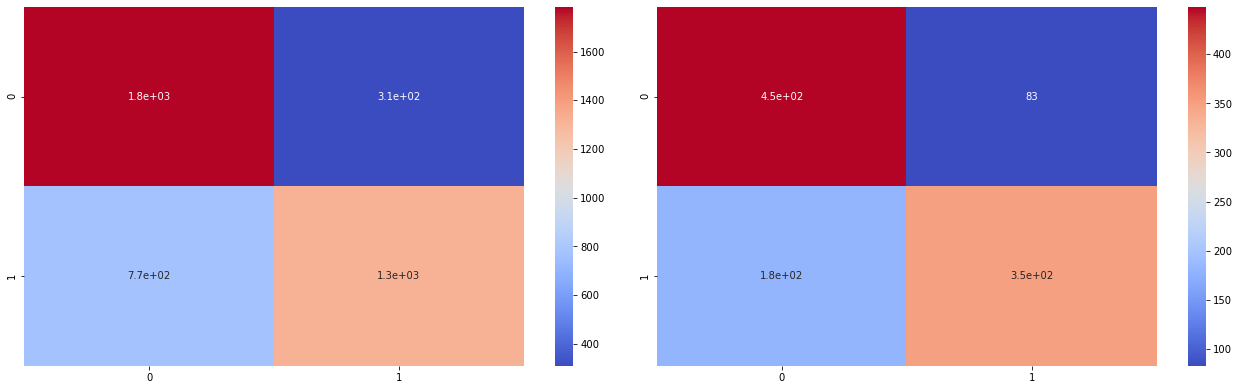

In [127]:
classification_metrics(y_train,y_pred_train,y_test,y_pred_test,True)

In [144]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0, C=100, gamma = 0.7)
classifier.fit(X_train, y_train)
#Predicting the Test Set
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [145]:
# from sklearn.model_selection import GridSearchCV
# parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear'],
#                'gamma': [0.1, 0.3, 0.5, 0.7, 0.9]}]
# grid_search = GridSearchCV(estimator = classifier,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10,)
# grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_
# #here is the best accuracy
# best_accuracy

train data:	  						test data:	

accuracy:	 0.7 						accuracy:	 0.57
precision:	 0.67 						precision:	 0.56
recall:		 0.78 						recall:		 0.64
F1:		 0.72 						F1:		 0.6


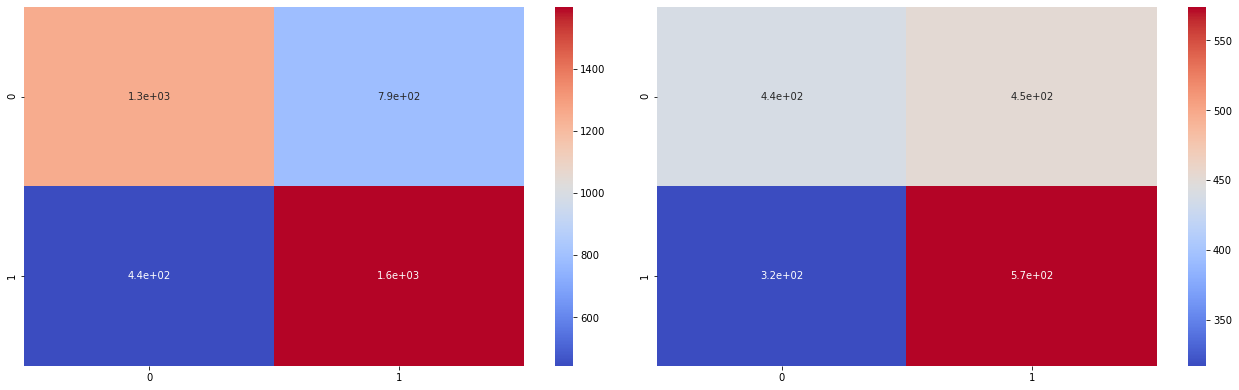

In [195]:
classification_metrics(y_train,y_pred_train,y_test,y_pred_test,True)

In [100]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

C:\Users\Raffael Kalandadze\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train data:	  						test data:	

accuracy:	 0.76 						accuracy:	 0.75
precision:	 0.8 						precision:	 0.78
recall:		 0.68 						recall:		 0.69
F1:		 0.74 						F1:		 0.73


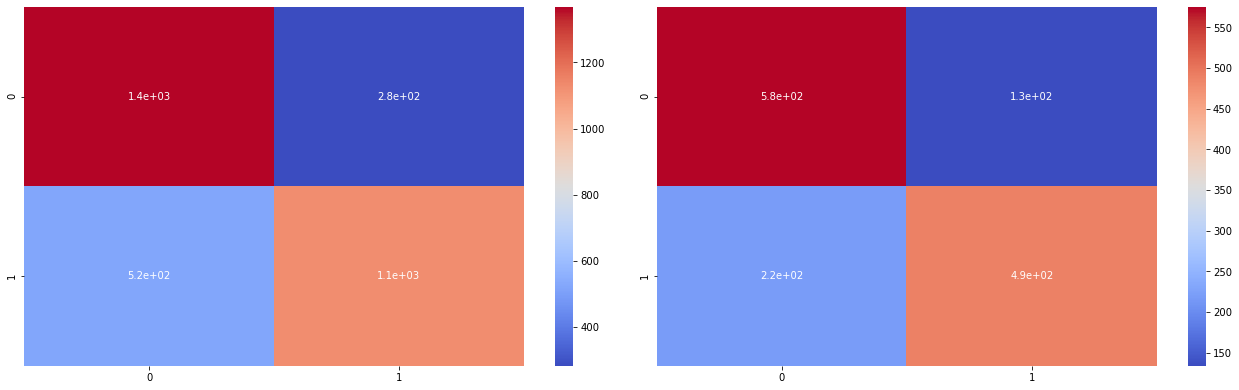

In [101]:
classification_metrics(y_train,y_pred_train,y_test,y_pred_test,True)